import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohamedmustafa/real-life-violence-situations-dataset")

print("Path to dataset files:", path)

In [7]:
import torchaudio
torchaudio.__version__

'2.6.0+cu118'

In [1]:
path = "C:\\Users\\harme\\.cache\\kagglehub\\datasets\\mohamedmustafa\\real-life-violence-situations-dataset\\versions\\1"

In [2]:
import os
import cv2
import sys

In [3]:
non_violence_video_dataset_path = r"C:\Users\harme\.cache\kagglehub\datasets\mohamedmustafa\real-life-violence-situations-dataset\versions\1\real life violence situations\Real Life Violence Dataset\NonViolence"
violence_dataset_path = r"C:\Users\harme\.cache\kagglehub\datasets\mohamedmustafa\real-life-violence-situations-dataset\versions\1\real life violence situations\Real Life Violence Dataset\Violence"

In [4]:
folder_path = violence_dataset_path
files = os.listdir(folder_path)
print(files)  # Lists all files and folders
len(files)


['V_1.mp4', 'V_10.mp4', 'V_100.mp4', 'V_1000.mp4', 'V_101.mp4', 'V_102.mp4', 'V_103.mp4', 'V_104.mp4', 'V_105.mp4', 'V_106.mp4', 'V_107.mp4', 'V_108.mp4', 'V_109.mp4', 'V_11.mp4', 'V_110.mp4', 'V_111.mp4', 'V_112.mp4', 'V_113.mp4', 'V_114.mp4', 'V_115.mp4', 'V_116.mp4', 'V_117.mp4', 'V_118.mp4', 'V_119.mp4', 'V_12.mp4', 'V_120.mp4', 'V_121.mp4', 'V_122.mp4', 'V_123.mp4', 'V_124.mp4', 'V_125.mp4', 'V_126.mp4', 'V_127.mp4', 'V_128.mp4', 'V_129.mp4', 'V_13.mp4', 'V_130.mp4', 'V_131.mp4', 'V_132.mp4', 'V_133.mp4', 'V_134.mp4', 'V_135.mp4', 'V_136.mp4', 'V_137.mp4', 'V_138.mp4', 'V_139.mp4', 'V_14.mp4', 'V_140.mp4', 'V_141.mp4', 'V_142.mp4', 'V_143.mp4', 'V_144.mp4', 'V_145.mp4', 'V_146.mp4', 'V_147.mp4', 'V_148.mp4', 'V_149.mp4', 'V_15.mp4', 'V_150.mp4', 'V_151.mp4', 'V_152.mp4', 'V_153.mp4', 'V_154.mp4', 'V_155.mp4', 'V_156.mp4', 'V_157.mp4', 'V_158.mp4', 'V_159.mp4', 'V_16.mp4', 'V_160.mp4', 'V_161.mp4', 'V_162.mp4', 'V_163.mp4', 'V_164.mp4', 'V_165.mp4', 'V_166.mp4', 'V_167.mp4', 'V_168

1000

In [5]:
files.sort()
print(files)
sample= files[0:5]
print(sample)

['V_1.mp4', 'V_10.mp4', 'V_100.mp4', 'V_1000.mp4', 'V_101.mp4', 'V_102.mp4', 'V_103.mp4', 'V_104.mp4', 'V_105.mp4', 'V_106.mp4', 'V_107.mp4', 'V_108.mp4', 'V_109.mp4', 'V_11.mp4', 'V_110.mp4', 'V_111.mp4', 'V_112.mp4', 'V_113.mp4', 'V_114.mp4', 'V_115.mp4', 'V_116.mp4', 'V_117.mp4', 'V_118.mp4', 'V_119.mp4', 'V_12.mp4', 'V_120.mp4', 'V_121.mp4', 'V_122.mp4', 'V_123.mp4', 'V_124.mp4', 'V_125.mp4', 'V_126.mp4', 'V_127.mp4', 'V_128.mp4', 'V_129.mp4', 'V_13.mp4', 'V_130.mp4', 'V_131.mp4', 'V_132.mp4', 'V_133.mp4', 'V_134.mp4', 'V_135.mp4', 'V_136.mp4', 'V_137.mp4', 'V_138.mp4', 'V_139.mp4', 'V_14.mp4', 'V_140.mp4', 'V_141.mp4', 'V_142.mp4', 'V_143.mp4', 'V_144.mp4', 'V_145.mp4', 'V_146.mp4', 'V_147.mp4', 'V_148.mp4', 'V_149.mp4', 'V_15.mp4', 'V_150.mp4', 'V_151.mp4', 'V_152.mp4', 'V_153.mp4', 'V_154.mp4', 'V_155.mp4', 'V_156.mp4', 'V_157.mp4', 'V_158.mp4', 'V_159.mp4', 'V_16.mp4', 'V_160.mp4', 'V_161.mp4', 'V_162.mp4', 'V_163.mp4', 'V_164.mp4', 'V_165.mp4', 'V_166.mp4', 'V_167.mp4', 'V_168

In [6]:
from IPython.display import display, Video

video_path = violence_dataset_path + "\\V_100.mp4"
display(Video(video_path, embed=True))


In [19]:
from utils.feature_extraction import ViolenceFeatureExtractor

extractor  = ViolenceFeatureExtractor("flask_app\models\detection_model.pt",
                                        "flask_app\models\segmentation_model.pt",
                                        "flask_app\models\pose_model.pt")


for file in sample:
    video_path = violence_dataset_path + "\\" + file  # Properly escape the backslash
    video_buffer = extractor.process_video(video_path, "extracted_feature_data\\violence_features.yaml")


Using GPU: NVIDIA GeForce RTX 3050 Laptop GPU
Error in pose analysis: index 5 is out of bounds for axis 0 with size 0
Error in pose drawing: index 5 is out of bounds for axis 0 with size 0
Error in pose analysis: index 5 is out of bounds for axis 0 with size 0
Error in pose drawing: index 5 is out of bounds for axis 0 with size 0
Error in pose analysis: index 5 is out of bounds for axis 0 with size 0
Error in motion calculation: axis 2 is out of bounds for array of dimension 2
Error in pose drawing: index 5 is out of bounds for axis 0 with size 0
Error in pose analysis: index 5 is out of bounds for axis 0 with size 0
Error in motion calculation: axis 2 is out of bounds for array of dimension 2
Error in pose drawing: index 5 is out of bounds for axis 0 with size 0
Error in pose analysis: index 5 is out of bounds for axis 0 with size 0
Error in motion calculation: axis 2 is out of bounds for array of dimension 2
Error in pose drawing: index 5 is out of bounds for axis 0 with size 0
Error

In [27]:
import pandas as pd
import numpy as np

In [3]:
data_apth = r"C:\Users\harme\Desktop\video-detect-gpu\extracted_feature_data\violence_features.yaml"

In [4]:
import yaml

with open(data_apth, "r") as file:
        data = yaml.safe_load(file)
   
print(data)


{'frames': [{'features': {'interactions': [{'box1': [280.5, 260.5, 391.5, 497.0], 'box2': [421.0, 248.375, 529.0, 496.5], 'center1': [336.0, 378.75], 'center2': [475.0, 372.4375], 'distance': 139.14326306454797, 'person1_idx': 0, 'person2_idx': 1, 'relative_distance': 0.005245839245397574}], 'motion': {}, 'objects': [{'box': [280.5, 260.5, 391.5, 497.0], 'class': 'person', 'confidence': 0.93115234375}, {'box': [421.0, 248.375, 529.0, 496.5], 'class': 'person', 'confidence': 0.8720703125}], 'poses': [[[309.75, 309.5, 0.984375], [315.0, 302.5, 0.98583984375], [306.75, 302.5, 0.6298828125], [338.5, 296.25, 0.9892578125], [0.0, 0.0, 0.06280517578125], [365.75, 333.75, 0.99951171875], [309.5, 320.5, 0.99462890625], [377.0, 392.75, 0.9970703125], [301.25, 350.5, 0.9658203125], [326.5, 388.0, 0.994140625], [294.0, 367.75, 0.95654296875], [341.0, 438.5, 0.9892578125], [299.5, 429.5, 0.97900390625], [0.0, 0.0, 0.48779296875], [0.0, 0.0, 0.34765625], [0.0, 0.0, 0.020843505859375], [0.0, 0.0, 0.0

In [64]:
# Extracting frame data
frames_data = data['frames']

# Creating a DataFrame from the frames data
df = pd.json_normalize(frames_data)

# Display the DataFram
df.head()

,frame_index,timestamp,features.interactions,features.objects,features.poses,features.violence_indicators.aggressive_pose,features.violence_indicators.close_interaction,features.violence_indicators.rapid_motion,features.violence_indicators.weapon_present,features.motion.average_speed,features.motion.motion_intensity,features.motion.sudden_movements
0,0,0.000000,"[{'box1': [280.5, 260.5, 391.5, 497.0], 'box2'...","[{'box': [280.5, 260.5, 391.5, 497.0], 'class'...","[[[309.75, 309.5, 0.984375], [315.0, 302.5, 0....",True,True,False,False,NaN,NaN,NaN
1,2,0.133333,"[{'box1': [280.25, 260.5, 391.25, 497.0], 'box...","[{'box': [280.25, 260.5, 391.25, 497.0], 'clas...","[[[309.75, 309.5, 0.984375], [315.0, 302.5, 0....",True,True,False,False,0.047695,0.102926,1.0
2,4,0.266667,"[{'box1': [280.25, 260.5, 391.25, 497.0], 'box...","[{'box': [280.25, 260.5, 391.25, 497.0], 'clas...","[[[309.75, 309.5, 0.984375], [315.0, 302.5, 0....",True,True,False,False,0.029542,0.080500,4.0
3,6,0.400000,"[{'box1': [280.5, 262.0, 391.5, 497.0], 'box2'...","[{'box': [280.5, 262.0, 391.5, 497.0], 'class'...","[[[310.0, 310.0, 0.9853515625], [315.25, 303.0...",True,True,False,False,4.632072,6.647933,1.0
4,8,0.533333,"[{'box1': [280.5, 262.0, 391.5, 497.5], 'box2'...","[{'box': [280.5, 262.0, 391.5, 497.5], 'class'...","[[[309.75, 309.5, 0.98486328125], [315.25, 302...",True,True,True,False,52.376305,153.160360,3.0


In [65]:
import pandas as pd

# Create a list to hold the extracted data
extracted_data = []

# Loop through each frame in the data
for frame in data['frames']:
    frame_index = frame['frame_index']
    timestamp = frame['timestamp']
    
    # Extract features
    interactions = frame['features']['interactions']
    objects = frame['features']['objects']
    violence_indicators = frame['features']['violence_indicators']
    poses = frame['features']['poses']
    motion = frame['features'].get('motion', {})
    
    # Loop through interactions (assuming there's only one interaction per frame)
    for interaction in interactions:
        # Extract interaction features
        interaction_data = {
            'frame_index': frame_index,
            'timestamp': timestamp,
            'box1': interaction['box1'],
            'box2': interaction['box2'],
            'center1': interaction['center1'],
            'center2': interaction['center2'],
            'distance': interaction['distance'],
            'person1_idx': interaction['person1_idx'],
            'person2_idx': interaction['person2_idx'],
            'relative_distance': interaction['relative_distance'],
            'motion_average_speed': motion.get('average_speed', None),
            'motion_motion_intensity': motion.get('motion_intensity', None),
            'motion_sudden_movements': motion.get('sudden_movements', None),
            'violence_aggressive_pose': violence_indicators['aggressive_pose'],
            'violence_close_interaction': violence_indicators['close_interaction'],
            'violence_rapid_motion': violence_indicators['rapid_motion'],
            'violence_weapon_present': violence_indicators['weapon_present'],
            'poses' : poses,
        }
        
        # Extract object features (assuming you want the first object)
        if objects:
            first_object = objects[0]
            interaction_data.update({
                'object_box': first_object['box'],
                'object_class': first_object['class'],
                'object_confidence': first_object['confidence']
            })
        
        # Append the interaction data to the list
        extracted_data.append(interaction_data)

# Create a DataFrame from the extracted data
df = pd.DataFrame(extracted_data)

# Display the DataFrame
print(df.head())

   frame_index  timestamp                            box1  \
0            0   0.000000    [280.5, 260.5, 391.5, 497.0]   
1            2   0.133333  [280.25, 260.5, 391.25, 497.0]   
2            4   0.266667  [280.25, 260.5, 391.25, 497.0]   
3            6   0.400000    [280.5, 262.0, 391.5, 497.0]   
4            8   0.533333    [280.5, 262.0, 391.5, 497.5]   

                             box2           center1            center2  \
0  [421.0, 248.375, 529.0, 496.5]   [336.0, 378.75]  [475.0, 372.4375]   
1  [421.0, 248.375, 529.0, 496.5]  [335.75, 378.75]  [475.0, 372.4375]   
2  [421.0, 248.375, 529.0, 496.5]  [335.75, 378.75]  [475.0, 372.4375]   
3    [419.0, 248.0, 521.0, 447.5]    [336.0, 379.5]    [470.0, 347.75]   
4  [380.0, 249.625, 509.0, 497.5]   [336.0, 379.75]  [444.5, 373.5625]   

     distance  person1_idx  person2_idx  relative_distance  ...  \
0  139.143263            0            1           0.005246  ...   
1  139.393006            0            1           0.00

In [66]:
df[:10]

,frame_index,timestamp,box1,box2,center1,center2,distance,person1_idx,person2_idx,relative_distance,...,motion_motion_intensity,motion_sudden_movements,violence_aggressive_pose,violence_close_interaction,violence_rapid_motion,violence_weapon_present,poses,object_box,object_class,object_confidence
0,0,0.000000,"[280.5, 260.5, 391.5, 497.0]","[421.0, 248.375, 529.0, 496.5]","[336.0, 378.75]","[475.0, 372.4375]",139.143263,0,1,0.005246,...,NaN,NaN,True,True,False,False,"[[[309.75, 309.5, 0.984375], [315.0, 302.5, 0....","[280.5, 260.5, 391.5, 497.0]",person,0.931152
1,2,0.133333,"[280.25, 260.5, 391.25, 497.0]","[421.0, 248.375, 529.0, 496.5]","[335.75, 378.75]","[475.0, 372.4375]",139.393006,0,1,0.005255,...,0.102926,1.0,True,True,False,False,"[[[309.75, 309.5, 0.984375], [315.0, 302.5, 0....","[280.25, 260.5, 391.25, 497.0]",person,0.931641
2,4,0.266667,"[280.25, 260.5, 391.25, 497.0]","[421.0, 248.375, 529.0, 496.5]","[335.75, 378.75]","[475.0, 372.4375]",139.393006,0,1,0.005255,...,0.080500,4.0,True,True,False,False,"[[[309.75, 309.5, 0.984375], [315.0, 302.5, 0....","[280.25, 260.5, 391.25, 497.0]",person,0.931152
3,6,0.400000,"[280.5, 262.0, 391.5, 497.0]","[419.0, 248.0, 521.0, 447.5]","[336.0, 379.5]","[470.0, 347.75]",137.710067,0,1,0.005931,...,6.647933,1.0,True,True,False,False,"[[[310.0, 310.0, 0.9853515625], [315.25, 303.0...","[280.5, 262.0, 391.5, 497.0]",person,0.935547
4,8,0.533333,"[280.5, 262.0, 391.5, 497.5]","[380.0, 249.625, 509.0, 497.5]","[336.0, 379.75]","[444.5, 373.5625]",108.676286,0,1,0.003740,...,153.160360,3.0,True,True,True,False,"[[[309.75, 309.5, 0.98486328125], [315.25, 302...","[280.5, 262.0, 391.5, 497.5]",person,0.930664
5,10,0.666667,"[280.5, 262.0, 391.5, 497.5]","[380.0, 249.5, 509.0, 497.0]","[336.0, 379.75]","[444.5, 373.25]",108.694526,0,1,0.003744,...,0.110340,2.0,True,True,False,False,"[[[309.75, 309.5, 0.98486328125], [315.25, 302...","[280.5, 262.0, 391.5, 497.5]",person,0.930664
6,12,0.800000,"[280.0, 262.5, 392.0, 497.5]","[362.5, 257.5, 495.5, 498.5]","[336.0, 380.0]","[429.0, 378.0]",93.021503,0,1,0.003187,...,102.872567,1.0,True,True,True,False,"[[[309.5, 309.5, 0.98486328125], [315.5, 302.7...","[280.0, 262.5, 392.0, 497.5]",person,0.926270
7,14,0.933333,"[280.0, 262.0, 392.0, 497.0]","[295.0, 267.0, 476.5, 499.0]","[336.0, 379.5]","[385.75, 383.0]",49.872964,0,1,0.001458,...,8.834953,1.0,True,True,False,False,"[[[309.0, 309.0, 0.98486328125], [315.0, 302.2...","[280.0, 262.0, 392.0, 497.0]",person,0.910156
8,14,0.933333,"[280.0, 262.0, 392.0, 497.0]","[349.0, 267.5, 476.0, 497.5]","[336.0, 379.5]","[412.5, 382.5]",76.558801,0,2,0.002757,...,8.834953,1.0,True,True,False,False,"[[[309.0, 309.0, 0.98486328125], [315.0, 302.2...","[280.0, 262.0, 392.0, 497.0]",person,0.910156
9,14,0.933333,"[295.0, 267.0, 476.5, 499.0]","[349.0, 267.5, 476.0, 497.5]","[385.75, 383.0]","[412.5, 382.5]",26.754672,1,2,0.000750,...,8.834953,1.0,True,True,False,False,"[[[309.0, 309.0, 0.98486328125], [315.0, 302.2...","[280.0, 262.0, 392.0, 497.0]",person,0.910156


In [67]:
df["poses"][0]

[[[309.75, 309.5, 0.984375],
  [315.0, 302.5, 0.98583984375],
  [306.75, 302.5, 0.6298828125],
  [338.5, 296.25, 0.9892578125],
  [0.0, 0.0, 0.06280517578125],
  [365.75, 333.75, 0.99951171875],
  [309.5, 320.5, 0.99462890625],
  [377.0, 392.75, 0.9970703125],
  [301.25, 350.5, 0.9658203125],
  [326.5, 388.0, 0.994140625],
  [294.0, 367.75, 0.95654296875],
  [341.0, 438.5, 0.9892578125],
  [299.5, 429.5, 0.97900390625],
  [0.0, 0.0, 0.48779296875],
  [0.0, 0.0, 0.34765625],
  [0.0, 0.0, 0.020843505859375],
  [0.0, 0.0, 0.0170440673828125]],
 [[459.0, 280.5, 0.98388671875],
  [470.0, 276.0, 0.9912109375],
  [459.25, 273.0, 0.728515625],
  [492.0, 285.0, 0.990234375],
  [0.0, 0.0, 0.097412109375],
  [507.5, 327.25, 0.99853515625],
  [458.75, 314.0, 0.95849609375],
  [505.25, 391.75, 0.99072265625],
  [450.75, 369.75, 0.5654296875],
  [455.75, 429.5, 0.9716796875],
  [0.0, 0.0, 0.484619140625],
  [479.25, 437.0, 0.95556640625],
  [446.5, 427.5, 0.83837890625],
  [0.0, 0.0, 0.37353515625],

In [68]:
df.head()

,frame_index,timestamp,box1,box2,center1,center2,distance,person1_idx,person2_idx,relative_distance,...,motion_motion_intensity,motion_sudden_movements,violence_aggressive_pose,violence_close_interaction,violence_rapid_motion,violence_weapon_present,poses,object_box,object_class,object_confidence
0,0,0.000000,"[280.5, 260.5, 391.5, 497.0]","[421.0, 248.375, 529.0, 496.5]","[336.0, 378.75]","[475.0, 372.4375]",139.143263,0,1,0.005246,...,NaN,NaN,True,True,False,False,"[[[309.75, 309.5, 0.984375], [315.0, 302.5, 0....","[280.5, 260.5, 391.5, 497.0]",person,0.931152
1,2,0.133333,"[280.25, 260.5, 391.25, 497.0]","[421.0, 248.375, 529.0, 496.5]","[335.75, 378.75]","[475.0, 372.4375]",139.393006,0,1,0.005255,...,0.102926,1.0,True,True,False,False,"[[[309.75, 309.5, 0.984375], [315.0, 302.5, 0....","[280.25, 260.5, 391.25, 497.0]",person,0.931641
2,4,0.266667,"[280.25, 260.5, 391.25, 497.0]","[421.0, 248.375, 529.0, 496.5]","[335.75, 378.75]","[475.0, 372.4375]",139.393006,0,1,0.005255,...,0.080500,4.0,True,True,False,False,"[[[309.75, 309.5, 0.984375], [315.0, 302.5, 0....","[280.25, 260.5, 391.25, 497.0]",person,0.931152
3,6,0.400000,"[280.5, 262.0, 391.5, 497.0]","[419.0, 248.0, 521.0, 447.5]","[336.0, 379.5]","[470.0, 347.75]",137.710067,0,1,0.005931,...,6.647933,1.0,True,True,False,False,"[[[310.0, 310.0, 0.9853515625], [315.25, 303.0...","[280.5, 262.0, 391.5, 497.0]",person,0.935547
4,8,0.533333,"[280.5, 262.0, 391.5, 497.5]","[380.0, 249.625, 509.0, 497.5]","[336.0, 379.75]","[444.5, 373.5625]",108.676286,0,1,0.003740,...,153.160360,3.0,True,True,True,False,"[[[309.75, 309.5, 0.98486328125], [315.25, 302...","[280.5, 262.0, 391.5, 497.5]",person,0.930664


In [69]:
df.isnull().sum()

frame_index                    0
timestamp                      0
box1                           0
box2                           0
center1                        0
center2                        0
distance                       0
person1_idx                    0
person2_idx                    0
relative_distance              0
motion_average_speed          62
motion_motion_intensity       62
motion_sudden_movements       62
violence_aggressive_pose       0
violence_close_interaction     0
violence_rapid_motion          0
violence_weapon_present        0
poses                          0
object_box                     0
object_class                   0
object_confidence              0
dtype: int64

In [70]:
df = df.drop(columns=["person1_idx", "person2_idx", "object_class", "object_confidence", "object_box"])

In [71]:
df.head()

,frame_index,timestamp,box1,box2,center1,center2,distance,relative_distance,motion_average_speed,motion_motion_intensity,motion_sudden_movements,violence_aggressive_pose,violence_close_interaction,violence_rapid_motion,violence_weapon_present,poses
0,0,0.000000,"[280.5, 260.5, 391.5, 497.0]","[421.0, 248.375, 529.0, 496.5]","[336.0, 378.75]","[475.0, 372.4375]",139.143263,0.005246,NaN,NaN,NaN,True,True,False,False,"[[[309.75, 309.5, 0.984375], [315.0, 302.5, 0...."
1,2,0.133333,"[280.25, 260.5, 391.25, 497.0]","[421.0, 248.375, 529.0, 496.5]","[335.75, 378.75]","[475.0, 372.4375]",139.393006,0.005255,0.047695,0.102926,1.0,True,True,False,False,"[[[309.75, 309.5, 0.984375], [315.0, 302.5, 0...."
2,4,0.266667,"[280.25, 260.5, 391.25, 497.0]","[421.0, 248.375, 529.0, 496.5]","[335.75, 378.75]","[475.0, 372.4375]",139.393006,0.005255,0.029542,0.080500,4.0,True,True,False,False,"[[[309.75, 309.5, 0.984375], [315.0, 302.5, 0...."
3,6,0.400000,"[280.5, 262.0, 391.5, 497.0]","[419.0, 248.0, 521.0, 447.5]","[336.0, 379.5]","[470.0, 347.75]",137.710067,0.005931,4.632072,6.647933,1.0,True,True,False,False,"[[[310.0, 310.0, 0.9853515625], [315.25, 303.0..."
4,8,0.533333,"[280.5, 262.0, 391.5, 497.5]","[380.0, 249.625, 509.0, 497.5]","[336.0, 379.75]","[444.5, 373.5625]",108.676286,0.003740,52.376305,153.160360,3.0,True,True,True,False,"[[[309.75, 309.5, 0.98486328125], [315.25, 302..."


In [89]:
df.head()

,frame_index,timestamp,distance,relative_distance,motion_average_speed,motion_motion_intensity,motion_sudden_movements,violence_aggressive_pose,violence_close_interaction,violence_rapid_motion,...,box1_x_max,box1_y_max,box2_x_min,box2_y_min,box2_x_max,box2_y_max,center1_x,center1_y,center2_x,center2_y
0,0,0.000000,139.143263,0.005246,NaN,NaN,NaN,True,True,False,...,391.50,497.0,421.0,248.375,529.0,496.5,336.00,378.75,475.0,372.4375
1,2,0.133333,139.393006,0.005255,0.047695,0.102926,1.0,True,True,False,...,391.25,497.0,421.0,248.375,529.0,496.5,335.75,378.75,475.0,372.4375
2,4,0.266667,139.393006,0.005255,0.029542,0.080500,4.0,True,True,False,...,391.25,497.0,421.0,248.375,529.0,496.5,335.75,378.75,475.0,372.4375
3,6,0.400000,137.710067,0.005931,4.632072,6.647933,1.0,True,True,False,...,391.50,497.0,419.0,248.000,521.0,447.5,336.00,379.50,470.0,347.7500
4,8,0.533333,108.676286,0.003740,52.376305,153.160360,3.0,True,True,True,...,391.50,497.5,380.0,249.625,509.0,497.5,336.00,379.75,444.5,373.5625


In [74]:
df = df.drop(columns=["poses"])

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3373 entries, 0 to 3372
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   frame_index                 3373 non-null   int64  
 1   timestamp                   3373 non-null   float64
 2   box1                        3373 non-null   object 
 3   box2                        3373 non-null   object 
 4   center1                     3373 non-null   object 
 5   center2                     3373 non-null   object 
 6   distance                    3373 non-null   float64
 7   relative_distance           3373 non-null   float64
 8   motion_average_speed        3311 non-null   float64
 9   motion_motion_intensity     3311 non-null   float64
 10  motion_sudden_movements     3311 non-null   float64
 11  violence_aggressive_pose    3373 non-null   bool   
 12  violence_close_interaction  3373 non-null   bool   
 13  violence_rapid_motion       3373 

In [84]:
df[["box1_x_min", "box1_y_min", "box1_x_max", "box1_y_max"]] = pd.DataFrame(df["box1"].to_list(), index=df.index)
df[["box2_x_min", "box2_y_min", "box2_x_max", "box2_y_max"]] = pd.DataFrame(df["box2"].to_list(), index=df.index)


In [85]:
df[["center1_x", "center1_y"]] = pd.DataFrame(df["center1"].to_list(), index=df.index)
df[["center2_x", "center2_y"]] = pd.DataFrame(df["center2"].to_list(), index=df.index)

In [88]:
df = df.drop(columns=["box1","box2","center1","center2"])

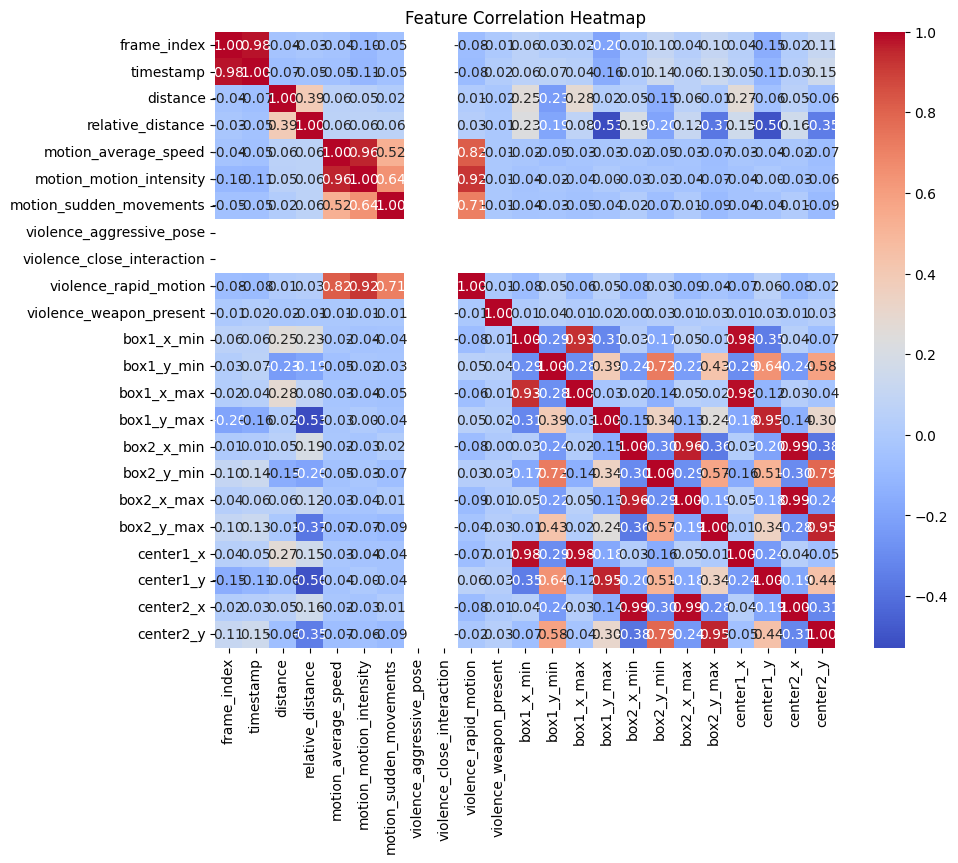

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [1]:
import sys
# Add the utils directory to Python path
sys.path.append('./utils')  # or '../utils' depending on your directory structure

from feature_extraction import ViolenceFeatureExtractor

In [3]:
# Initialize the feature extractor
detection_model_path = "flask_app\models\detection_model.pt"
pose_model_path = "flask_app\models\pose_model.pt"
feature_extractor = ViolenceFeatureExtractor(detection_model_path, pose_model_path)

# Process a video file
video_path = r"C:\Users\harme\Desktop\video-detect-gpu\video_data\non-violence\6.mp4"
output_csv_path = "extracted_feature_data\output_features.csv"

# Process the video and get features
features = feature_extractor.process_video(video_path, output_csv_path)

# features will contain the extracted features for each frame
print(f"Extracted {len(features)} frames of features")

Using GPU: NVIDIA GeForce RTX 3050 Laptop GPU
Data saved to extracted_feature_data\output_features.csv
Extracted 226 frames of features
